## Classification Problem

In [178]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
# from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.losses import CategoricalCrossentropy

### Step 1: Load the Iris dataset

In [179]:
iris = load_iris(as_frame = False)
X = iris.data
y = iris.target.reshape(-1, 1)

In [180]:
# y = y.astype(np.int64)
# y = to_categorical(y, num_classes=3)

encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(y)

### Problem 2: Divide the data into training (50%), validation (20%), and testing (30%)

In [181]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y_encoded, test_size = 0.5, stratify = y_encoded, random_state = 42)  # 50% train, 50% temp
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size = 0.6, stratify = y_temp, random_state = 42) # 20% val, 30% test

In [182]:
print("Training set shape:", X_train.shape)  
print("Validation set shape:", X_val.shape)  
print("Test set shape:", X_test.shape)  

Training set shape: (75, 4)
Validation set shape: (30, 4)
Test set shape: (45, 4)


### Problem 3: Build Keras network

In [183]:
model = Sequential()
model.add(Dense(10, input_dim = 4, activation = 'sigmoid'))
model.add(Dense(3, activation='softmax'))

c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Step 4: Compile the model

In [184]:
model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['accuracy'])

In [185]:
model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_26 (Dense)                │ (None, 10)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 3)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 83 (332.00 B)

 Trainable params: 83 (332.00 B)

 Non-trainable params: 0 (0.00 B)

### Step 5: Fit the model

In [186]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=500, verbose=1)

Epoch 1/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - accuracy: 0.3854 - loss: 1.5396 - val_accuracy: 0.3333 - val_loss: 1.6381
Epoch 2/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3464 - loss: 1.6103 - val_accuracy: 0.3333 - val_loss: 1.6165
Epoch 3/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.3346 - loss: 1.6038 - val_accuracy: 0.3333 - val_loss: 1.5949
Epoch 4/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.2839 - loss: 1.6914 - val_accuracy: 0.3333 - val_loss: 1.5737
Epoch 5/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.3542 - loss: 1.5424 - val_accuracy: 0.3333 - val_loss: 1.5532
Epoch 6/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.3464 - loss: 1.5393 - val_accuracy: 0.3333 - val_loss: 1.5328
Epoch 7/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3112 - loss: 1.5784 - val_accuracy: 0.3333 - val_loss: 1.5124
Epoch 8/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.3268 - loss: 1.5392 - val_accuracy: 0.3333 - val_loss

### Step 6: Plot error (loss) curve

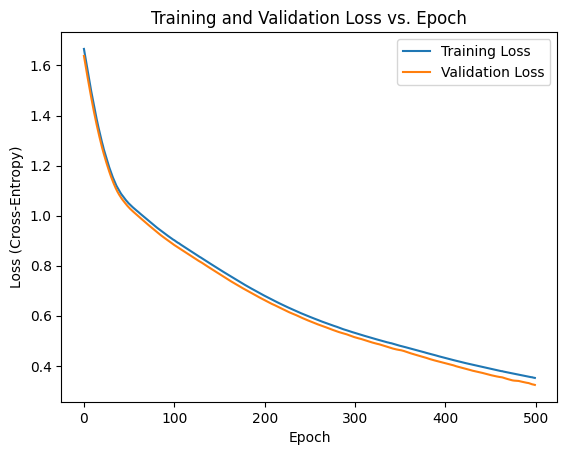

In [187]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (Cross-Entropy)')
plt.title('Training and Validation Loss vs. Epoch')
plt.legend()
plt.show()

In [188]:
best_epoch = np.argmin(history.history['val_loss']) + 1
best_val_loss = np.min(history.history['val_loss'])
print(f"Best epoch: {best_epoch}, Validation Loss: {best_val_loss:.6f}")

Best epoch: 500, Validation Loss: 0.323684


### Step 7: Predict y values using test data

In [189]:
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1) 
y_test_labels = np.argmax(y_test, axis=1)  

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


### Step 8: Compute confusion matrix and accuracy

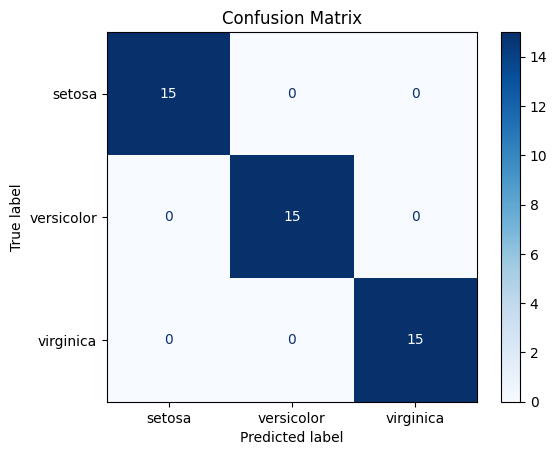

In [190]:
cm = confusion_matrix(y_test_labels, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [191]:
accuracy = np.sum(np.diag(cm)) / np.sum(cm)
print(f"Test Accuracy: {accuracy:.6f}")

Test Accuracy: 1.000000
